In [44]:
from tifffile import imread
import os
from os.path import join
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem, pearsonr
import pandas as pd
import seaborn as sns

sns.set(color_codes=True, style="white")
pd.options.mode.chained_assignment = None  # default='warn'

### Load Data

In [2]:
folder_FUS_FL = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/paper_figure_plots/bioRxiv_version_Figs/Fig3/FUS488_FL_PAINT/pooled_better_best"
folder_save = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/paper_figure_plots/Aug24_new_Figs/ALEX_perpxl_stats-FL_FUS_loc"
os.chdir(folder_FUS_FL)

lst_fname_FUS_PAINT = [f for f in os.listdir(".") if f.endswith("-left-PAINT.tif")]
lst_fname_FL_PAINT = [f[:-14] + "right-PAINT.tif" for f in lst_fname_FUS_PAINT]
lst_fname_FUS_step = [f[:-14] + "left-stepsize.tif" for f in lst_fname_FUS_PAINT]
lst_fname_FL_step = [f[:-14] + "right-stepsize.tif" for f in lst_fname_FUS_PAINT]

lst_FUS_PAINT = [imread(f) for f in lst_fname_FUS_PAINT]
lst_FL_PAINT = [imread(f) for f in lst_fname_FL_PAINT]
lst_FUS_step = [imread(f) for f in lst_fname_FUS_step]
lst_FL_step = [imread(f) for f in lst_fname_FL_step]

In [3]:
fontsize = 15

### Functions

In [4]:
def weighted_Pearson(img1_flatten, img2_flatten, weights):
    # calculate mean for images and weights
    mean_img1 = np.sum(img1_flatten * weights) / np.sum(weights)
    mean_img2 = np.sum(img2_flatten * weights) / np.sum(weights)
    mean_weights = np.mean(weights)

    # calculate weighted covariance and variances
    cov = np.sum(
        weights * (img1_flatten - mean_img1) * (img2_flatten - mean_img2)
    ) / np.sum(weights)
    var_img1 = np.sum(weights * (img1_flatten - mean_img1) ** 2) / np.sum(weights)
    var_img2 = np.sum(weights * (img2_flatten - mean_img2) ** 2) / np.sum(weights)

    # calculate weighted correlation
    weighted_corr = cov / np.sqrt(var_img1 * var_img2)

    return weighted_corr

### FUS PAINT - FL PAINT

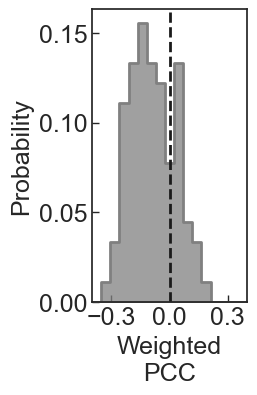

In [45]:
pcc_abs_max = 0.4
weighted_corr_FlocRloc = []
lst_pval = []
for img1, img2 in zip(lst_FUS_PAINT, lst_FL_PAINT):
    img1_flatten = img1.flatten()
    img2_flatten = img2.flatten()
    weights = img1_flatten**1 + img2_flatten**1 # This is to prevent the empty pixels from
    weighted_corr = weighted_Pearson(img1_flatten, img2_flatten, weights)
    # weighted_corr, pval = pearsonr(img1_flatten, img2_flatten)
    weighted_corr_FlocRloc.append(weighted_corr)
    # lst_pval.append(pval)

plt.figure(figsize=(2, 3.8))
df = pd.DataFrame({"value": weighted_corr_FlocRloc}, dtype=float)
sns.histplot(
    data=df,
    x="value",
    bins=17,
    binrange=(-pcc_abs_max, pcc_abs_max),
    stat="probability",
    lw=2,
    element="step",
    color="gray",
)
plt.axvline(0, c="k", lw=2, ls="--")
plt.xlim(-pcc_abs_max, pcc_abs_max)
plt.xticks([-0.3, 0, 0.3])
# plt.ylim(0, 0.27)
# plt.yticks([0, 0.1, 0.2])
plt.xlabel("Weighted\nPCC", fontsize=fontsize)
plt.ylabel("Probability", fontsize=fontsize)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=fontsize,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.savefig(
    join(folder_save,"weighted_pearson_FlocRloc.png"), format="png", dpi=300, bbox_inches="tight"
)
# print(np.mean(weighted_corr_FlocRloc), sem(weighted_corr_FlocRloc))